## Portfolio assignment 16
30 min: Train a decision tree to predict one of the categorical columns of your own dataset.
- Split your dataset into a train (70%) and test (30%) set.
- Use the train set to fit a DecisionTreeClassifier. You are free to to choose which columns you want to use as feature variables and you are also free to choose the max_depth of the tree. 
- Use your decision tree model to make predictions for both the train and test set.
- Calculate the accuracy for both the train set predictions and test set predictions.
- Is the accurracy different? Did you expect this difference?
- Use the plot_tree function above to create a plot of the decision tree. Take a few minutes to analyse the decision tree. Do you understand the tree?

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [2]:
Pokemon = pd.read_csv("Pokemon.csv", sep=";")

In [3]:
Pokemon.head()

,abilities,attack,capture_rate,classfication,defense,experience_growth,height_m,hp,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Rock Head', 'Sturdy', 'Sand Veil', 'Magnet P...",80,255.0,Rock Pokémon,100,1059860,0,40,Geodude,50,74,30,30,20,rock,ground,0,1,0
1,"['Stench', 'Sticky Hold', 'Poison Touch', 'Poi...",80,190.0,Sludge Pokémon,50,1000000,0,80,Grimer,50,88,40,50,25,poison,poison,0,1,0
2,"['Rock Head', 'Sturdy', 'Sand Veil', 'Magnet P...",95,120.0,Rock Pokémon,115,1059860,0,55,Graveler,50,75,45,45,35,rock,ground,0,1,0
3,"['Sand Veil', 'Sand Rush', 'Snow Cloak', 'Slus...",75,255.0,Mouse Pokémon,90,1000000,0,50,Sandshrew,50,27,10,35,40,ground,ice,0,1,0
4,"['Chlorophyll', 'Harvest', 'Frisk', 'Harvest']",105,45.0,Coconut Pokémon,85,1250000,0,95,Exeggutor,50,103,125,75,45,grass,psychic,0,1,0


In [4]:
CleanPokemonDS = Pokemon['is_legendary'] = Pokemon['is_legendary'].astype(str)


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
pokemon_train, pokemon_test = train_test_split(Pokemon, test_size=0.3, random_state=42, stratify=Pokemon['is_legendary'])
print(pokemon_train.shape, pokemon_test.shape)

(560, 19) (241, 19)


In [7]:
features= ['sp_attack', 'sp_defense']
dt_classification = DecisionTreeClassifier(max_depth = 10) # Increase max_depth to see effect in the plot
dt_classification.fit(pokemon_train[features], pokemon_train['is_legendary'])

DecisionTreeClassifier(max_depth=10)

In [8]:
predictions = dt_classification.predict(Pokemon[features])

In [9]:
predictions

array(['0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0',
       '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0',
       '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0',
       '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1',
       '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0

In [10]:
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

In [11]:
calculate_accuracy(predictions, Pokemon.is_legendary)

0.9450686641697877

### Ik had geen volledige 100% accuraatheid verwacht. Dit omdat er legendarische pokemons zijn met een hoge speciale aanval maar met een lage speciale verdediging.

In [12]:
from sklearn import tree
import graphviz

def plot_tree_classification(model, features, class_names):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          class_names=class_names,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

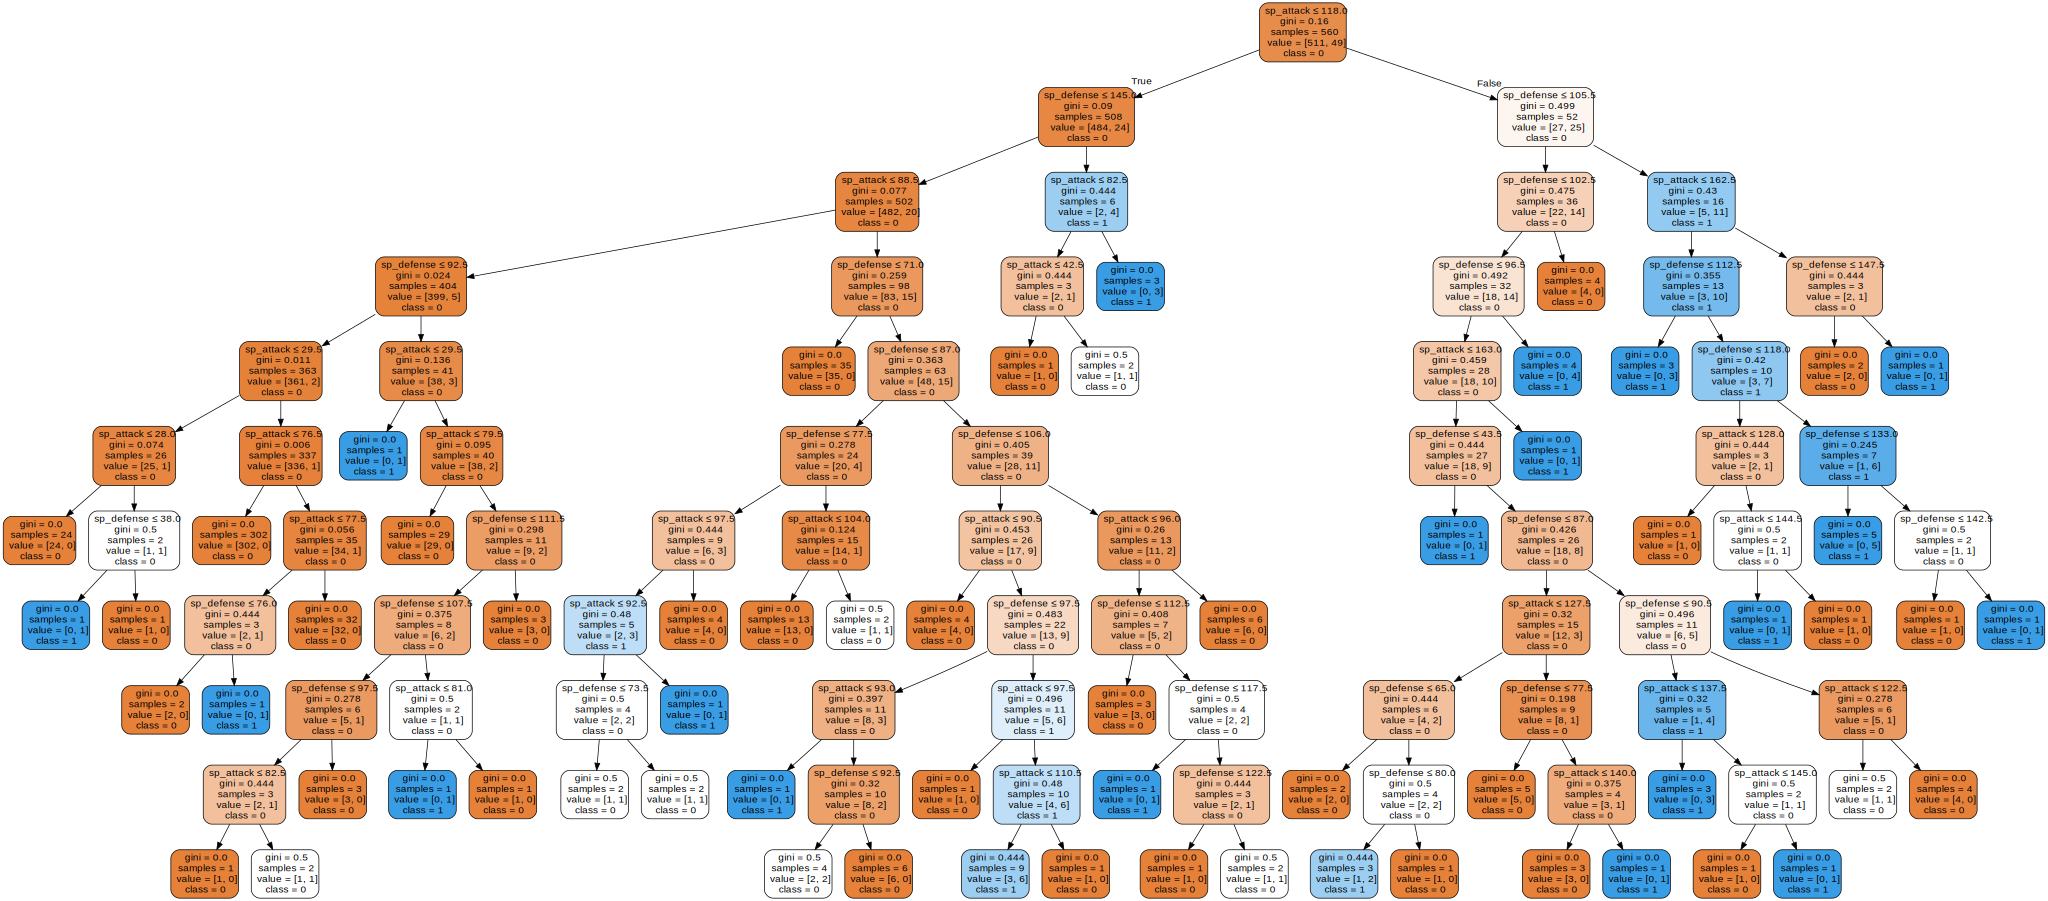

In [13]:
plot_tree_classification(dt_classification, features, np.sort(Pokemon.is_legendary.unique()))